In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
gauss_blur = os.listdir('../input/gaussian_blurred')
gauss_blur.sort()
sharp = os.listdir('../input/sharp')
sharp.sort()

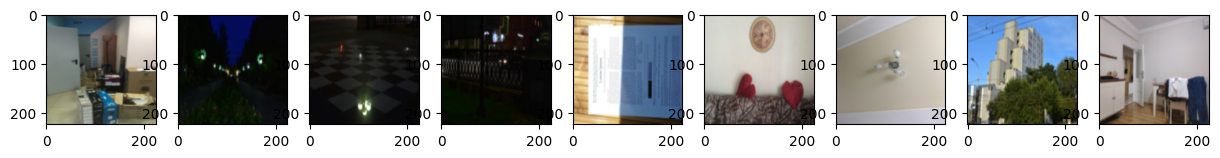

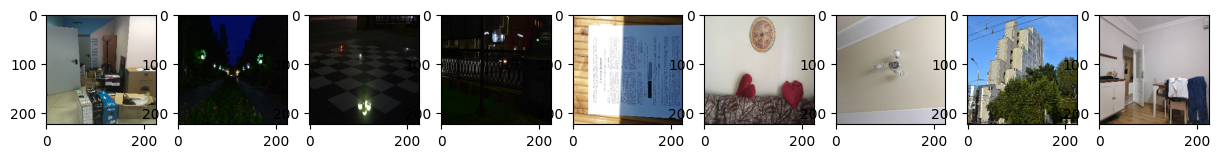

In [3]:
plt.figure(figsize=(15, 12))
for i in range(9):
    blur_image = plt.imread(f"../input/gaussian_blurred/{gauss_blur[i]}")
    blur_image = cv2.resize(blur_image, (224, 224))
    plt.subplot(1, 9, i+1)
    plt.imshow(blur_image)
plt.show()

plt.figure(figsize=(15, 12))
for i in range(9):
    sharp_image = plt.imread(f"../input/sharp/{sharp[i]}")
    sharp_image = cv2.resize(sharp_image, (224, 224))
    plt.subplot(1, 9, i+1)
    plt.imshow(sharp_image)
plt.show()

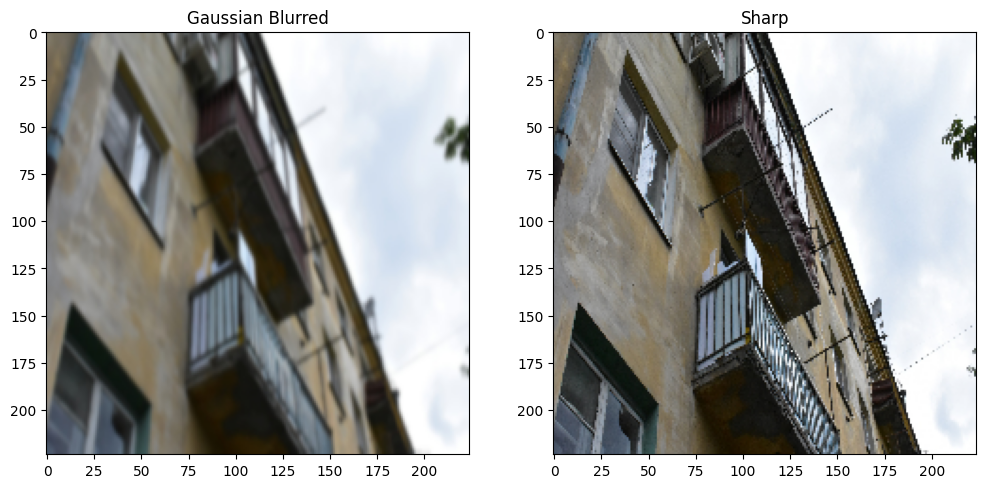

In [2]:
import matplotlib.pyplot as plt
import cv2

# Load an image from the "gaussian_blurred" folder
gauss_blur_path = "../input/gaussian_blurred/134_NIKON-D3400-18-55MM_S.jpg"  # Replace with the actual filename
gauss_blur_image = plt.imread(gauss_blur_path)
gauss_blur_image = cv2.resize(gauss_blur_image, (224, 224))

# Load an image from the "sharp" folder
sharp_path = "../input/sharp/134_NIKON-D3400-18-55MM_S.jpg"  # Replace with the actual filename
sharp_image = plt.imread(sharp_path)
sharp_image = cv2.resize(sharp_image, (224, 224))

# Create subplots to display both images side by side
plt.figure(figsize=(12, 6))

# Subplot 1 for the Gaussian blurred image
plt.subplot(1, 2, 1)
plt.imshow(gauss_blur_image)
plt.title("Gaussian Blurred")

# Subplot 2 for the sharp image
plt.subplot(1, 2, 2)
plt.imshow(sharp_image)
plt.title("Sharp")

plt.show()


In [4]:
'''
Checking that the blur and sharp images correspond correctly
'''
x_blur = []
for i in range(len(gauss_blur)):
    x_blur.append(gauss_blur[i])

y_sharp = []
for i in range(len(sharp)):
    y_sharp.append(sharp[i])
    
print(x_blur[10])
print(y_sharp[10])

109_HONOR-7X_S.jpg
109_HONOR-7X_S.jpg


In [16]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Function to calculate PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load the ground truth and deblurred images
ground_truth = cv2.imread('image.jpg')
deblurred = cv2.imread('image.jpg')

# Ensure both images have the same dimensions
ground_truth = cv2.resize(ground_truth, (deblurred.shape[1], deblurred.shape[0]))

# Calculate PSNR
psnr_value = calculate_psnr(ground_truth, deblurred)
print(f'PSNR: {psnr_value}')

# Calculate SSIM
ssim_value = ssim(ground_truth, deblurred, win_size=3, multichannel=True)
print(f'SSIM: {ssim_value}')


PSNR: inf
SSIM: 1.0


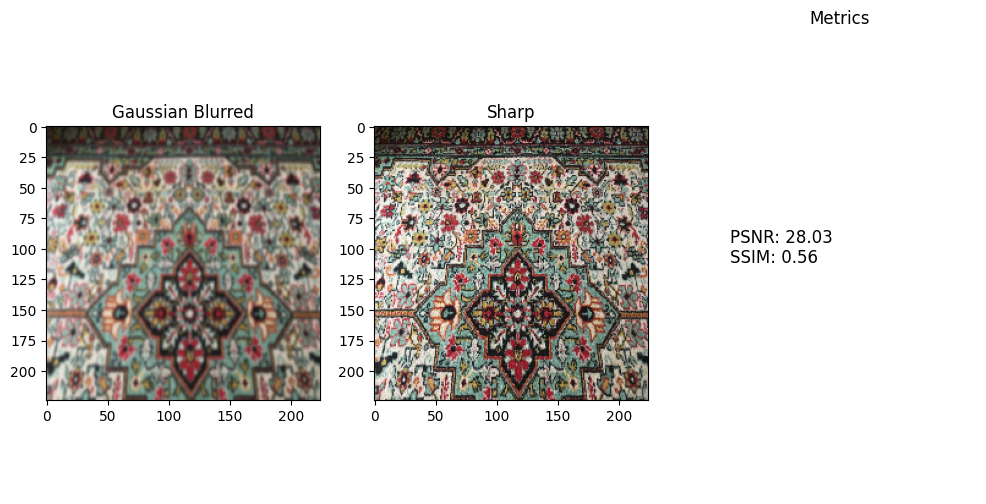

In [26]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Load an image from the "gaussian_blurred" folder
gauss_blur_path = "../input/gaussian_blurred/327_IPHONE-SE_S.jpg"  # Replace with the actual filename
gauss_blur_image = plt.imread(gauss_blur_path)
gauss_blur_image = cv2.resize(gauss_blur_image, (224, 224))

# Load an image from the "sharp" folder
sharp_path = "../input/sharp/327_IPHONE-SE_S.jpg"  # Replace with the actual filename
sharp_image = plt.imread(sharp_path)
sharp_image = cv2.resize(sharp_image, (224, 224))

# Create subplots to display both images side by side
plt.figure(figsize=(12, 6))

# Subplot 1 for the Gaussian blurred image
plt.subplot(1, 3, 1)
plt.imshow(gauss_blur_image)
plt.title("Gaussian Blurred")

# Subplot 2 for the sharp image
plt.subplot(1, 3, 2)
plt.imshow(sharp_image)
plt.title("Sharp")

# Subplot 3 for PSNR and SSIM values
ground_truth = cv2.imread(sharp_path)  # Load the sharp image as the ground truth
deblurred = cv2.imread(gauss_blur_path)  # Load the Gaussian blurred image as the deblurred image

# Ensure both images have the same dimensions
ground_truth = cv2.resize(ground_truth, (deblurred.shape[1], deblurred.shape[0]))

# Calculate PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

psnr_value = calculate_psnr(ground_truth, deblurred)
ssim_value = ssim(ground_truth, deblurred, win_size=3, multichannel=True)

# Display PSNR and SSIM values in Subplot 3
plt.subplot(1, 3, 3)
plt.text(0.1, 0.5, f'PSNR: {psnr_value:.2f}\nSSIM: {ssim_value:.2f}', fontsize=12)
plt.axis('off')
plt.title("Metrics")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load sharp, blurred, and deblurred images for one example
sharp_image = cv2.imread('sharp_example.jpg')
blurred_image = cv2.imread('blurred_example.jpg')
deblurred_image = cv2.imread('deblurred_example.jpg')

# Ensure all images have the same dimensions (resize if necessary)
blurred_image = cv2.resize(blurred_image, (sharp_image.shape[1], sharp_image.shape[0]))
deblurred_image = cv2.resize(deblurred_image, (sharp_image.shape[1], sharp_image.shape[0]))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Subplot 1 for sharp image
axes[0].imshow(cv2.cvtColor(sharp_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Sharp Image")

# Subplot 2 for blurred image
axes[1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Blurred Image")

# Subplot 3 for deblurred image
axes[2].imshow(cv2.cvtColor(deblurred_image, cv2.COLOR_BGR2RGB))
axes[2].set_title("Deblurred Image")

# Add annotations or callout boxes as needed

# Display the subplots
plt.tight_layout()
plt.show()


In [34]:
import torch

import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
import models
import torch
from torchvision.transforms import transforms
from torchvision.utils import save_image



device = 'cpu'

# load the trained model
# model = models.CNN().to(device).eval()
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

from torchviz import make_dot

# Assuming 'model' is your PyTorch model
dot = make_dot(model(torch.randn(1, 3, 525, 525).to(device)))
dot.render("model_graph")  # This will save the model graph as 'model_graph.pdf'


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH